In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np
import pandas as pd
import cv2

from sklearn.utils import shuffle
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

import warnings

warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/self-driving-cars/labels_train.csv')
df = shuffle(df)
df.head()

,frame,xmin,xmax,ymin,ymax,class_id
79808,1479500568616892959.jpg,79,102,143,153,1
44162,1478897395108965791.jpg,98,205,138,224,1
121070,1479505228929089457.jpg,60,74,145,156,1
127018,1479505743971845092.jpg,4,43,127,151,1
79803,1479500567615986431.jpg,298,410,88,171,2


In [3]:
classes = df.class_id.unique()
print(classes)


[1 2 3 5 4]


In [4]:
labels = { 1:'car', 2:'truck', 3:'person', 4:'bicycle', 5:'traffic light'}

In [6]:
# Get path images and boxes (x,y) for each class_id
boxes = {}
images = {}

base_path = '../input/self-driving-cars/images/'

for class_id in classes:
    first_row = df[df['class_id'] == class_id].iloc[0]
    
    images[class_id] = cv2.imread(base_path + first_row['frame'])
    boxes[class_id] = [first_row['xmin'],first_row['xmax'],first_row['ymin'],first_row['ymax']]

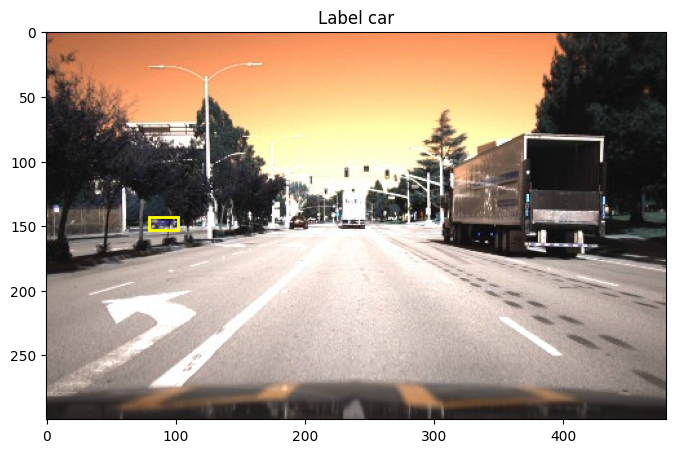

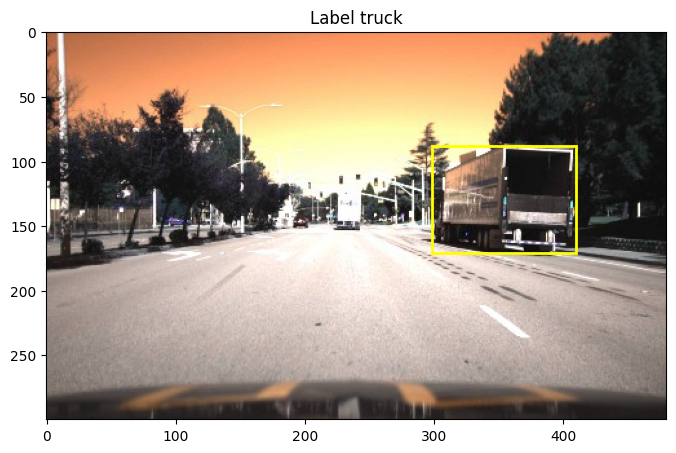

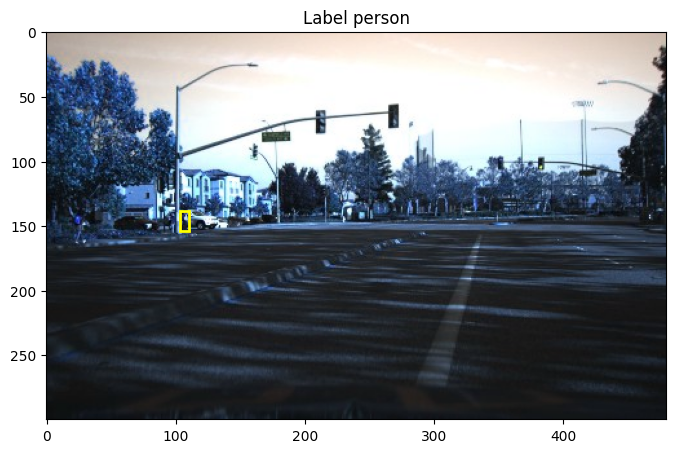

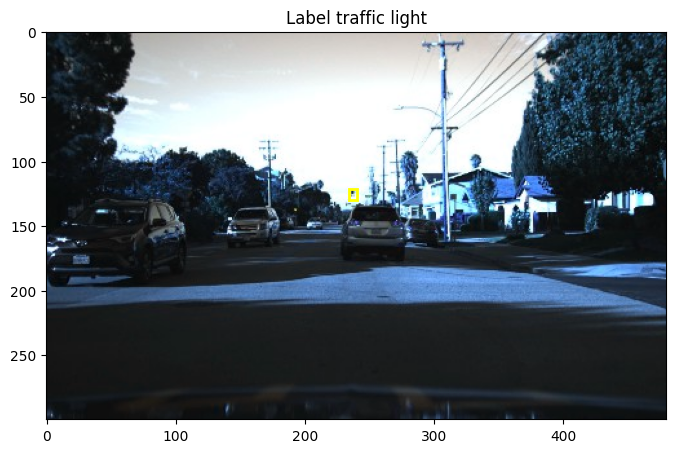

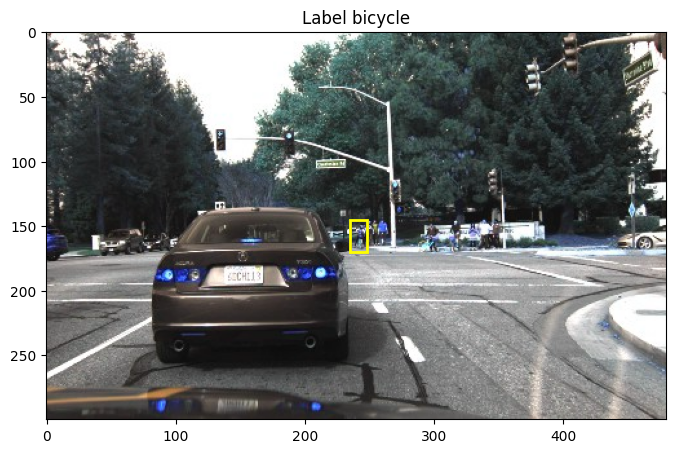

In [7]:
for i in classes:

    xmin, xmax, ymin, ymax = boxes[i][0], boxes[i][1], boxes[i][2], boxes[i][3]

    plt.figure(figsize=(8, 10))
    plt.title("Label " + labels[i])
    plt.imshow(images[i])
    plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color='yellow', fill=False, linewidth=2))
    
    plt.show()

In [8]:
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.5/780.5 kB 18.9 MB/s eta 0:00:0000:01


In [9]:
from ultralytics import YOLO
import PIL 
from PIL import Image
from IPython.display import display
import os 
import pathlib 

In [10]:
model = YOLO("yolov8m.pt")


100%|██████████| 49.7M/49.7M [00:00<00:00, 221MB/s]


In [11]:
results=model.predict(source="/kaggle/input/self-driving-cars/images/1478019956680248165.jpg",
              save=True, conf=0.2,iou=0.5)


image 1/1 /kaggle/input/self-driving-cars/images/1478019956680248165.jpg: 416x640 1 car, 1 truck, 1133.4ms
Speed: 10.7ms preprocess, 1133.4ms inference, 23.8ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict


In [12]:
result = results[0]
box = result.boxes[0]

In [14]:
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    probs = result.probs  # Class probabilities for classification outputs

In [15]:
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: 2.0
Coordinates: [124.69143676757812, 142.6882781982422, 148.7809295654297, 162.10047912597656]
Probability: 0.7161701321601868


In [16]:
for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

Object type: car
Coordinates: [125, 143, 149, 162]
Probability: 0.72
---
Object type: truck
Coordinates: [141, 139, 157, 154]
Probability: 0.31
---


In [17]:
results1 = model.predict(source="/kaggle/input/self-driving-cars/images/1478020211690815798.jpg",
              save=True, conf=0.2,iou=0.5)

Results = results1[0]


image 1/1 /kaggle/input/self-driving-cars/images/1478020211690815798.jpg: 416x640 4 cars, 3 traffic lights, 983.9ms
Speed: 2.4ms preprocess, 983.9ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict


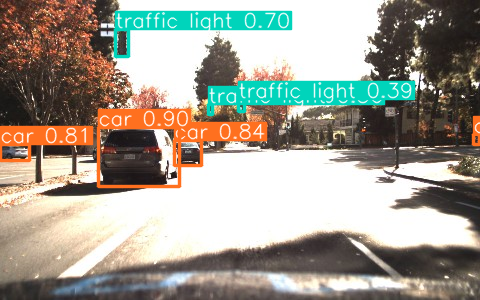

In [18]:
# Plotting results
plot = results1[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))